In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import sobel_h, sobel_v, sobel
from skimage.filters import prewitt_h, prewitt_v, prewitt

# Preparación

In [8]:
objects = cv2.imread('images/OBJECTS.png', cv2.IMREAD_GRAYSCALE)

In [9]:
image_int32 = np.int32(objects)

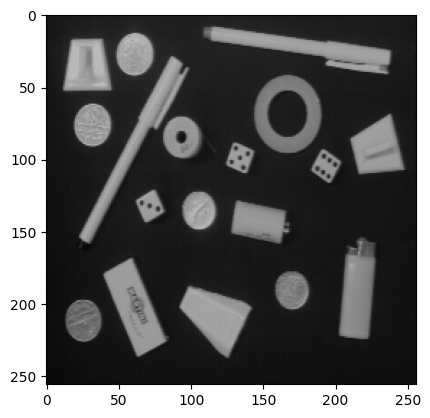

In [36]:
plt.imshow(image_int32, cmap='gray', vmin=0, vmax=255)

# Operador de Sobel

In [37]:
img_sh = sobel_h(image_int32)
img_sv = sobel_v(image_int32)

img_sh_abs = np.abs(img_sh)
img_sv_abs = np.abs(img_sv)
img_m = img_sh_abs + img_sv_abs

Text(0.5, 1.0, 'Sobel')

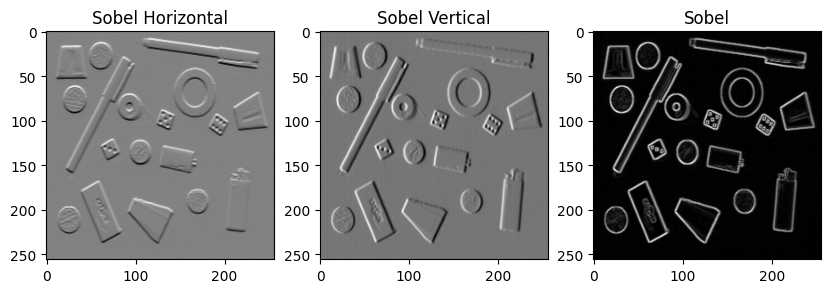

In [40]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_sh, cmap='gray')
plt.title('Sobel Horizontal')

plt.subplot(1, 3, 2)
plt.imshow(img_sv, cmap='gray')
plt.title('Sobel Vertical')

plt.subplot(1, 3, 3)
plt.imshow(img_m, cmap='gray')
plt.title('Sobel')


## Descripción

## Filtro Sobel

In [41]:
img_s = sobel(image_int32)

Text(0.5, 1.0, 'Sobel Horizontal + Vertical')

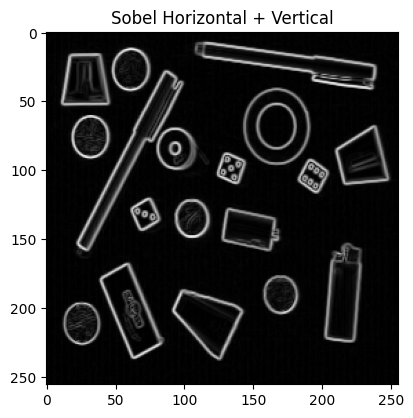

In [44]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_s, cmap='gray')
plt.title('Sobel Horizontal + Vertical')

# Operador de Prewitt

In [45]:
img_ph = prewitt_h(image_int32)
img_pv = prewitt_v(image_int32)

img_ph_abs = np.abs(img_ph)
img_pv_abs = np.abs(img_pv)
img_pm = img_ph_abs + img_pv_abs

Text(0.5, 1.0, 'Prewitt')

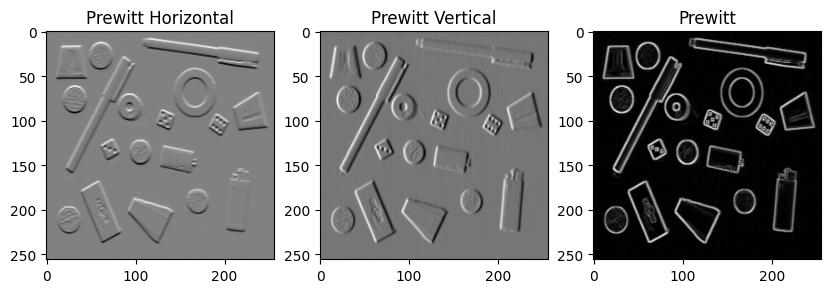

In [46]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_ph, cmap='gray')
plt.title('Prewitt Horizontal')

plt.subplot(1, 3, 2)
plt.imshow(img_pv, cmap='gray')
plt.title('Prewitt Vertical')

plt.subplot(1, 3, 3)
plt.imshow(img_pm, cmap='gray')
plt.title('Prewitt')

## Descripción

# Filtro Prewitt

In [47]:
img_p = prewitt(image_int32)

Text(0.5, 1.0, 'Prewitt Horizontal + Vertical')

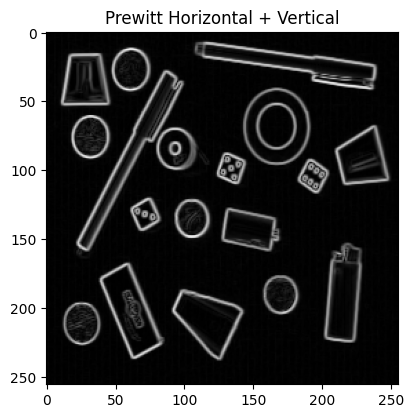

In [48]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_p, cmap='gray')
plt.title('Prewitt Horizontal + Vertical')

# Diferencia entre Sobel y Prewitt:

In [49]:
sub = cv2.subtract(img_pm, img_m)

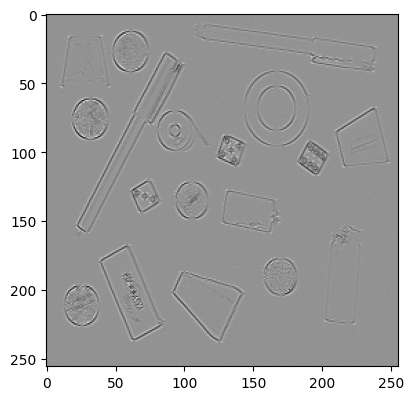

In [50]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(sub, cmap='gray')

## ¿Qué diferencia visual hay entre el operador de Sobel y el de Prewitt?

In [54]:
def show_histogram(image, values=256):
  histogram, bin_edges = np.histogram(image, bins=values, range=(0, values-1))
  fig, ax = plt.subplots()
  ax.set_title("Grayscale Histogram")
  ax.set_xlabel("grayscale value")
  ax.set_ylabel("pixel count")
  ax.set_xlim([0.0, values-1])

  ax.plot(bin_edges[0:-1], histogram)
  plt.show()

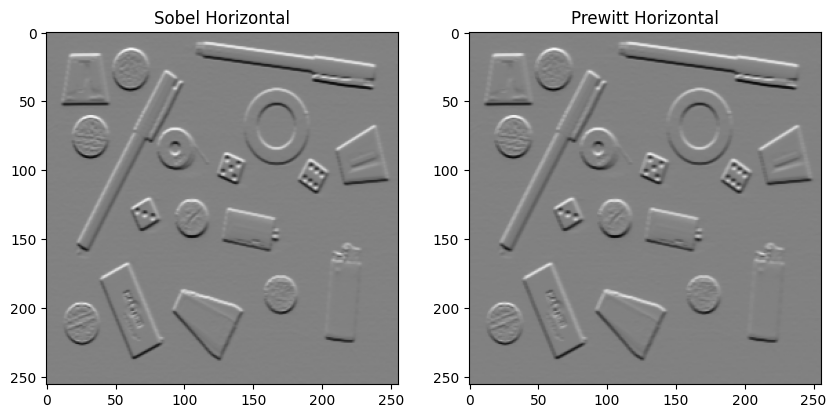

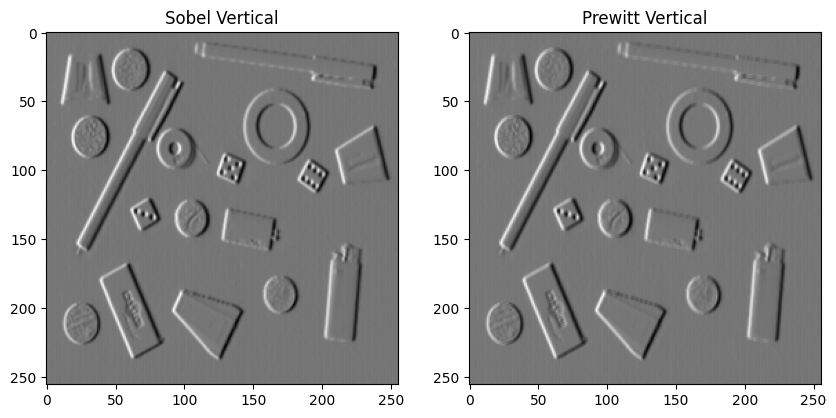

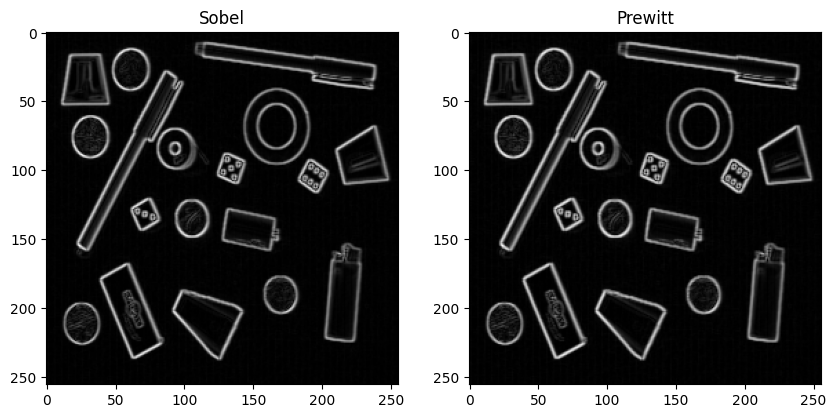

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_sh, cmap='gray')
plt.title('Sobel Horizontal')

plt.subplot(1, 2, 2)
plt.imshow(img_ph, cmap='gray')
plt.title('Prewitt Horizontal')

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_sv, cmap='gray')
plt.title('Sobel Vertical')

plt.subplot(1, 2, 2)
plt.imshow(img_pv, cmap='gray')
plt.title('Prewitt Vertical')


plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_m, cmap='gray')
plt.title('Sobel')

plt.subplot(1, 2, 2)
plt.imshow(img_pm, cmap='gray')
plt.title('Prewitt')
plt.show()

## Para explicar esta diferencia, calcule numéricamente las respuestas del cálculo del gradiente en x, en y y de la norma del gradiente de cada uno de los dos filtros en los siguientes casos:

## Para explicar esta diferencia, calcule numéricamente las respuestas del cálculo del gradiente en x, en y y de la norma del gradiente de cada uno de los dos filtros en los siguientes casos: